# EDA Data Insights

As shown in the overview notebook, the first step for every EDA, after making the data available, is to find a proper way to plot said data, and to run commands so as to show some initial insights into the data we are working with.

This notebook will run this $1^{st}$ step in the most common types of Data we can come across in a Data Science project. As such, we will focus on:

- Numerical Data (descriptive statistics), which was already shown on the [Overview](EDA_overview.ipynb) notebook;
- Categorical Data (cross tabulations);
- Time Series (rolling statistics);
- Text Data (word frequencies);
- Image Data (Pixel Value Statistics)
  
## Index



**Libraries used:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
import cv2
from skimage import data

## 1. Numerical Data

As stated in the [Overview](EDA_overview.ipynb) notebook, numerical data is analysed using summary statistics and visualisations.

Key techniques include:
- **Histograms & KDE Plots** (for distributions)
- **Boxplots** (for detecting outliers)
- **Scatterplots** (for relationships between variables)

              price         carat         depth
count  53940.000000  53940.000000  53940.000000
mean    3932.799722      0.797940     61.749405
std     3989.439738      0.474011      1.432621
min      326.000000      0.200000     43.000000
25%      950.000000      0.400000     61.000000
50%     2401.000000      0.700000     61.800000
75%     5324.250000      1.040000     62.500000
max    18823.000000      5.010000     79.000000


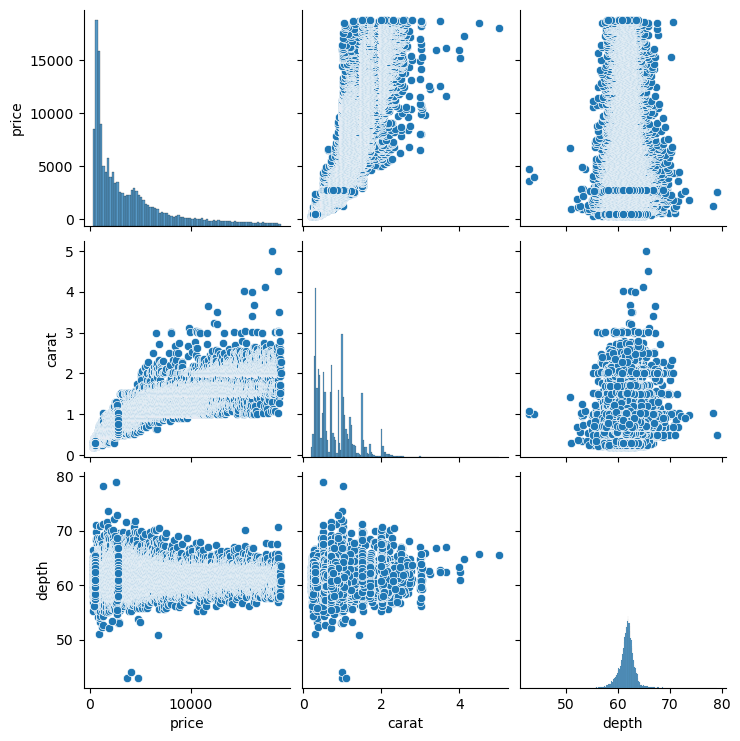

In [3]:
# Example: Analyzing House Prices Dataset
house_prices = sns.load_dataset("diamonds")[["price", "carat", "depth"]]
print(house_prices.describe())

# Pairplot to visualise relationships
sns.pairplot(house_prices)
plt.show()

## 2. Categorical Data

Categorical data is analysed using frequency distributions and bar charts. Differently from numerical data, the techniques now include:

- **Count plots** (for frequency of categories)
- **Pie charts** (for proportion analysis)
- **Cross-tabulations** (for relationships)

class
Third     491
First     216
Second    184
Name: count, dtype: int64
sex     female  male
class               
First       94   122
Second      76   108
Third      144   347


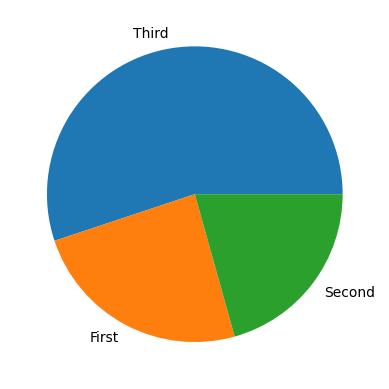

In [6]:
# Example: Analyzing Titanic Dataset
df = sns.load_dataset("titanic")
print(df["class"].value_counts())
print(pd.crosstab(df["class"], df["sex"]))
plt.pie(df["class"].value_counts(), labels=df["class"].unique())
plt.show()

## 3. Time Series Data

Time series data analysis focuses on trends, seasonality, and stationarity. Strategies include:

- **Line plots** (for trend visualisation)
- **Rolling mean & standard deviation** (for smoothing data)
- **Autocorrelation plots** (for periodicity analysis)

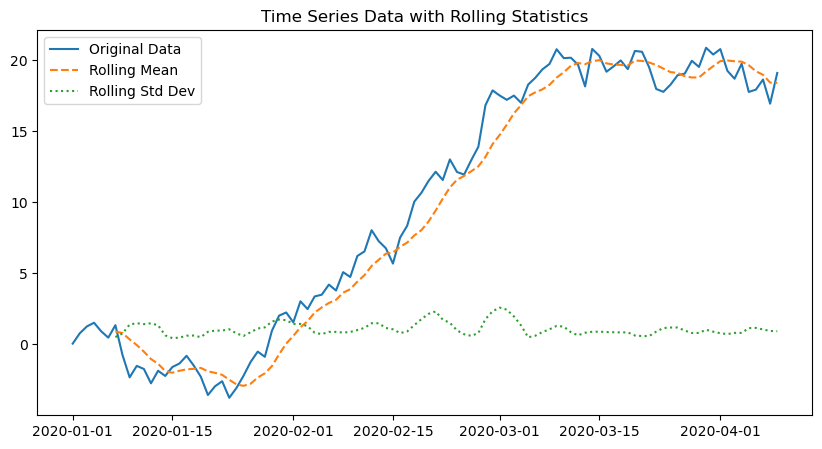

In [7]:
# Example: Simulated Time Series Data
time_series = pd.date_range(start="2020-01-01", periods=100, freq="D")
data = np.cumsum(np.random.randn(100))
ts_df = pd.DataFrame({"Date": time_series, "Value": data})
ts_df.set_index("Date", inplace=True)

# Compute rolling mean and standard deviation
rolling_mean = ts_df["Value"].rolling(window=7).mean()
rolling_std = ts_df["Value"].rolling(window=7).std()

# Plot Time Series with Rolling Statistics
plt.figure(figsize=(10,5))
plt.plot(ts_df, label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', linestyle='dashed')
plt.plot(rolling_std, label='Rolling Std Dev', linestyle='dotted')
plt.title("Time Series Data with Rolling Statistics")
plt.legend()
plt.show()